In [105]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import month_plot, quarter_plot, plot_acf, plot_pacf
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_error

In [106]:
path = "/home/mano/Manoj/Learning/time_series/data/time-series-analysis/Time Series Analysis/CAPSTONE PROJECT - Airmiles/airmiles.csv"

In [107]:
df = pd.read_csv(path, index_col="Date", parse_dates=True, dayfirst=True)
df.head(20)

,airmiles
Date,
1996-01-01,30983174
1996-02-01,32147663
1996-03-01,38342975
1996-04-01,35969113
1996-05-01,36474391
1996-06-01,38772238
1996-07-01,40395657
1996-08-01,41738499
1996-09-01,33580773


In [108]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 113 entries, 1996-01-01 to 2005-05-01
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   airmiles  113 non-null    int64
dtypes: int64(1)
memory usage: 1.8 KB


airmiles    0
dtype: int64

In [109]:
df = df.asfreq('MS')
df.head()

,airmiles
Date,
1996-01-01,30983174
1996-02-01,32147663
1996-03-01,38342975
1996-04-01,35969113
1996-05-01,36474391


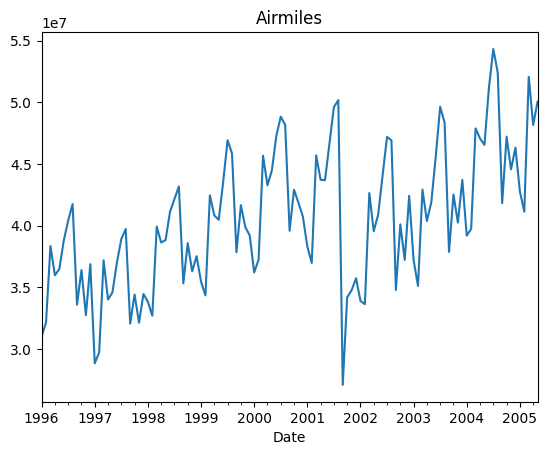

In [110]:
# Visualize
df['airmiles'].plot(title="Airmiles")
plt.show()

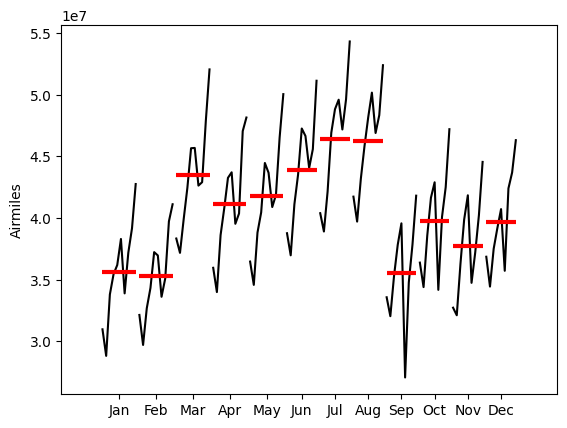

In [132]:
# Plot monthly seasonlity
month_plot(df['airmiles'], ylabel='Airmiles')
plt.show()

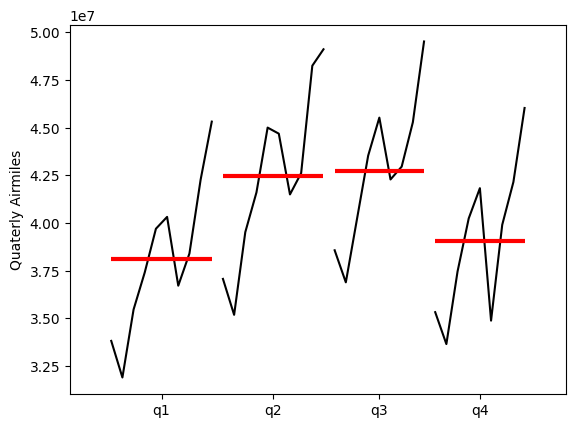

In [112]:
# Plot quaterly seasonlity
quarter_plot(df['airmiles'].resample('QE').mean(), ylabel='Quaterly Airmiles')
plt.show()

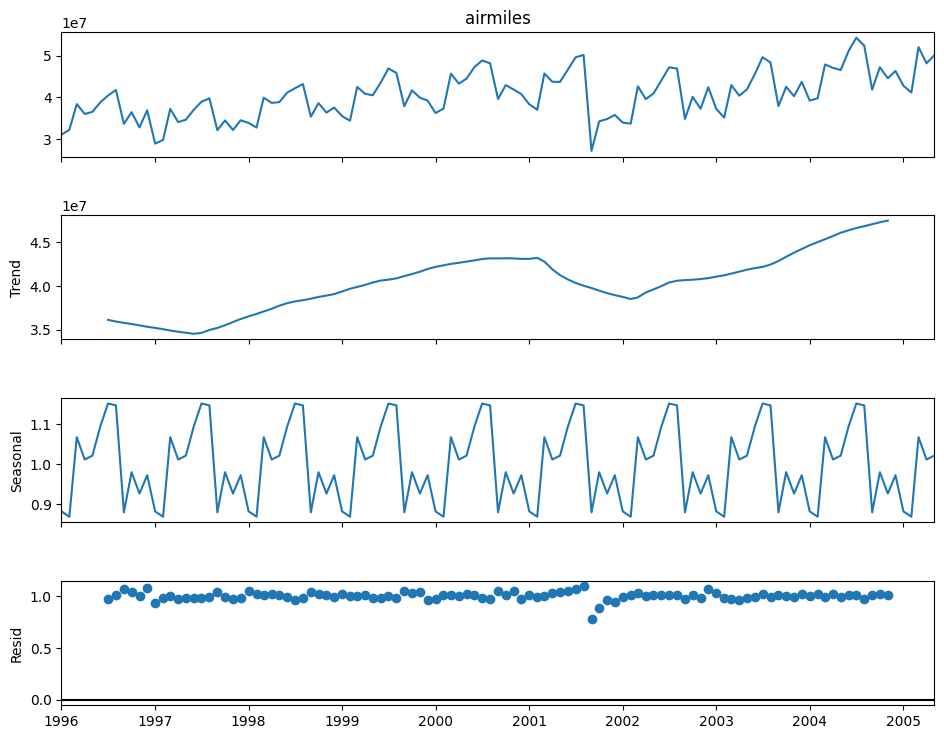

In [133]:
# Seasonal decomposition
decomposition = seasonal_decompose(df['airmiles'], model='mul', period=12)
fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.show()

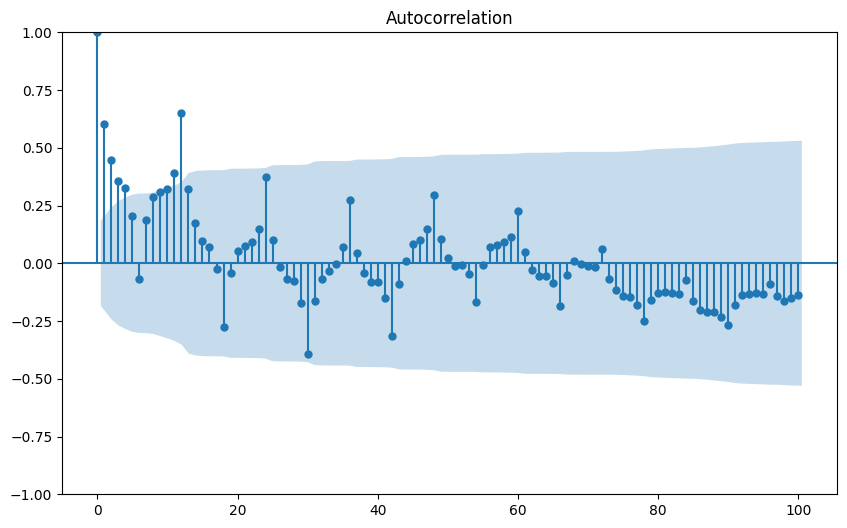

In [134]:
fig, ax = plt.subplots(figsize=(10,6))
plot_acf(df['airmiles'], lags=100, ax=ax)
plt.show()

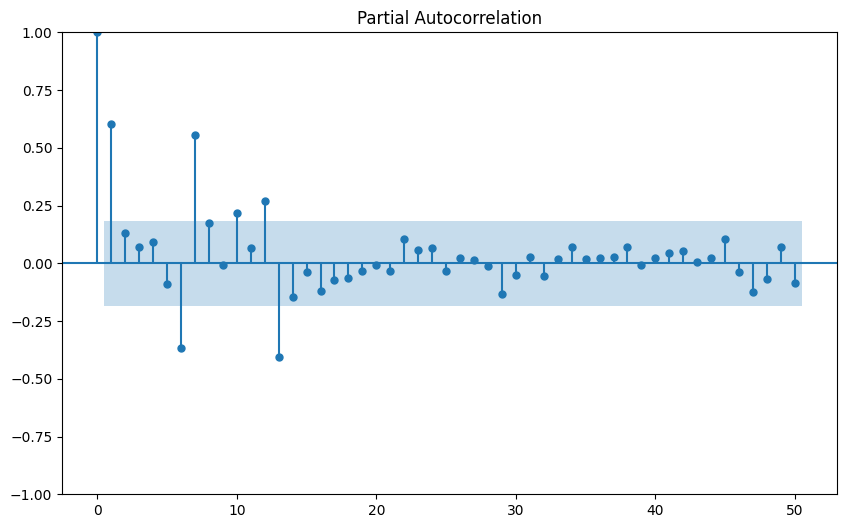

In [135]:
fig, ax = plt.subplots(figsize=(10,6))
plot_pacf(df['airmiles'], lags=50, ax=ax)
plt.show()

In [136]:
periods = 12
train, test = df.iloc[:-periods,0], df.iloc[-periods:, 0]

In [137]:
def model_assessment(train, test, prediction, title):
    plt.figure(figsize=(10, 4))
    plt.plot(train, label="Train")
    plt.plot(test, label="Test")
    plt.plot(prediction, label="Forecast")
    plt.legend()
    plt.title(f"Train, test, and forecase for {title}")

    plt.show()

    mae = mean_absolute_error(test, prediction)
    rmse = root_mean_squared_error(test, prediction)
    mape = mean_absolute_percentage_error(test, prediction)

    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAPE:  {100 * mape:.2f}")

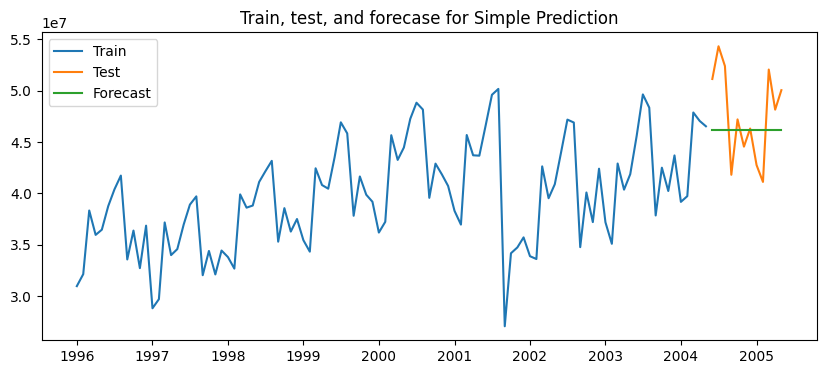

MAE: 3887742.81
RMSE: 4498018.84
MAPE:  8.04


In [138]:
# simple exponential
model_simple = SimpleExpSmoothing(train).fit()
prediction_simple = model_simple.forecast(len(test))
model_assessment(train, test, prediction_simple, "Simple Prediction")

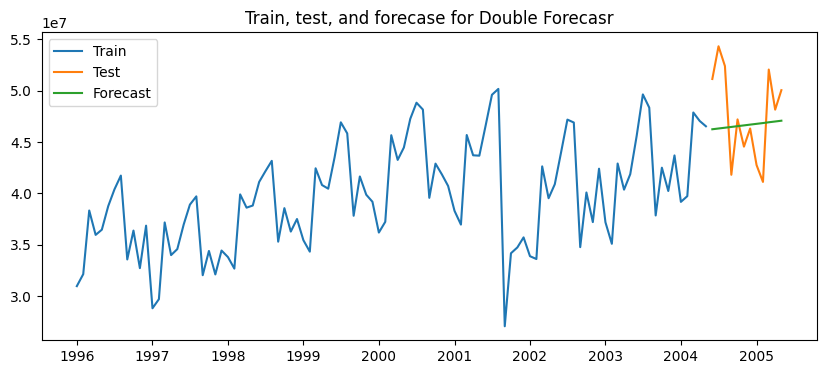

MAE: 3803154.69
RMSE: 4432032.69
MAPE:  7.93


In [139]:
# Double Exponential
model_double = ExponentialSmoothing(train, trend="mul", seasonal=None).fit()
prediction_double = model_double.forecast(len(test))
model_assessment(train, test, prediction_double, "Double Forecasr")

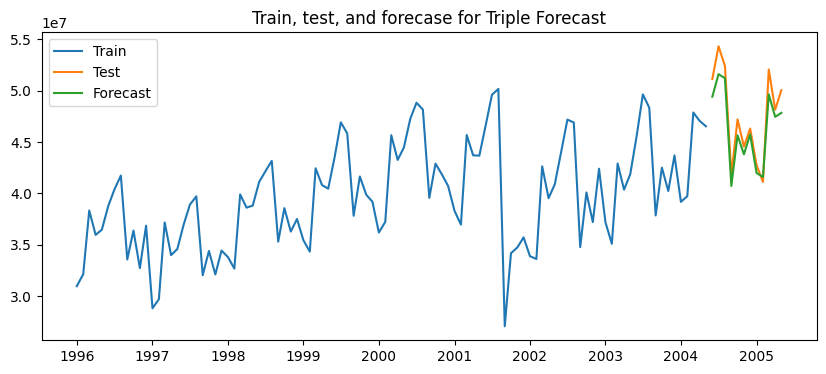

MAE: 1345907.96
RMSE: 1533881.26
MAPE:  2.74


In [150]:
# Triple Exponential
model_triple = ExponentialSmoothing(train, trend="mul", seasonal="add", seasonal_periods=12).fit()
prediction_triple = model_triple.forecast(len(test))
model_assessment(train, test, prediction_triple, "Triple Forecast")

In [151]:
# Predict future
model = ExponentialSmoothing(df.airmiles, trend='add', seasonal='mul', seasonal_periods=12).fit()
forecast = model.forecast(12)

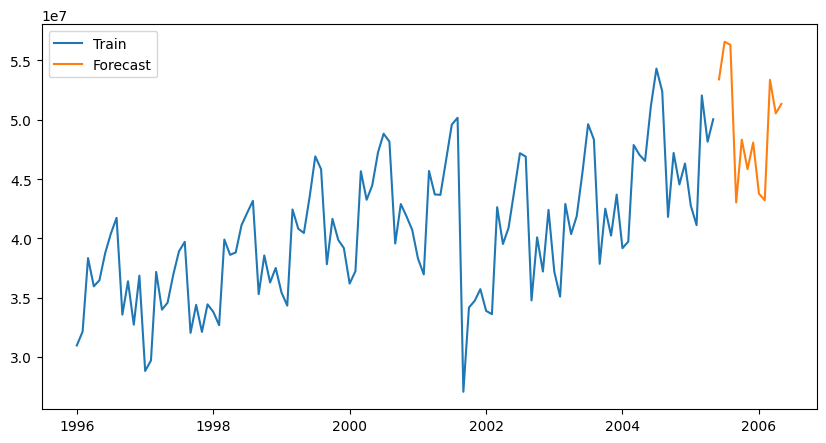

In [146]:
plt.figure(figsize=(10, 5))
plt.plot(df.airmiles, label="Train")
plt.plot(forecast, label="Forecast")
plt.legend()
plt.show()